<a href="https://colab.research.google.com/github/paulagiovanna/IC---Covid19-Random-Walk/blob/master/draw_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!sudo apt-get install libgeos-3.5.0
!sudo apt-get install libgeos-dev
!sudo pip install https://github.com/matplotlib/basemap/archive/master.zip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756020 sha256=888d8e4964c0f8aa2c5ee7025e87a68062bf0500408bba2bb655f622465a4f2a
  Stored in directory: /tmp/pip-ephem-wheel-cache-8b_8r0e3/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [0]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap as Basemap

In [39]:
#Substituir os imports

from google.colab import drive
drive.mount('/content/drive')

transition_matrix =  pd.read_csv('/content/drive/Shared drives/IC/transition_matrix_edge_list.csv')
state_vector =  pd.read_csv('/content/drive/Shared drives/IC/state_vector.csv')
state_vector = state_vector.set_index("country")
lat_long =  pd.read_csv('/content/drive/Shared drives/IC/lat_long.csv', sep=";")
lat_long = lat_long.set_index("name")
lat_long = lat_long.drop(columns=['country'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
G=nx.from_pandas_edgelist(transition_matrix, source='pais_origem', target='pais_destino', edge_attr='prob')
probs = [i['prob'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}

In [0]:
nodes_list = list(G.nodes)
nodes_size = []

for country in nodes_list:
  nodes_size.append(state_vector.loc[country, "state"]*40)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


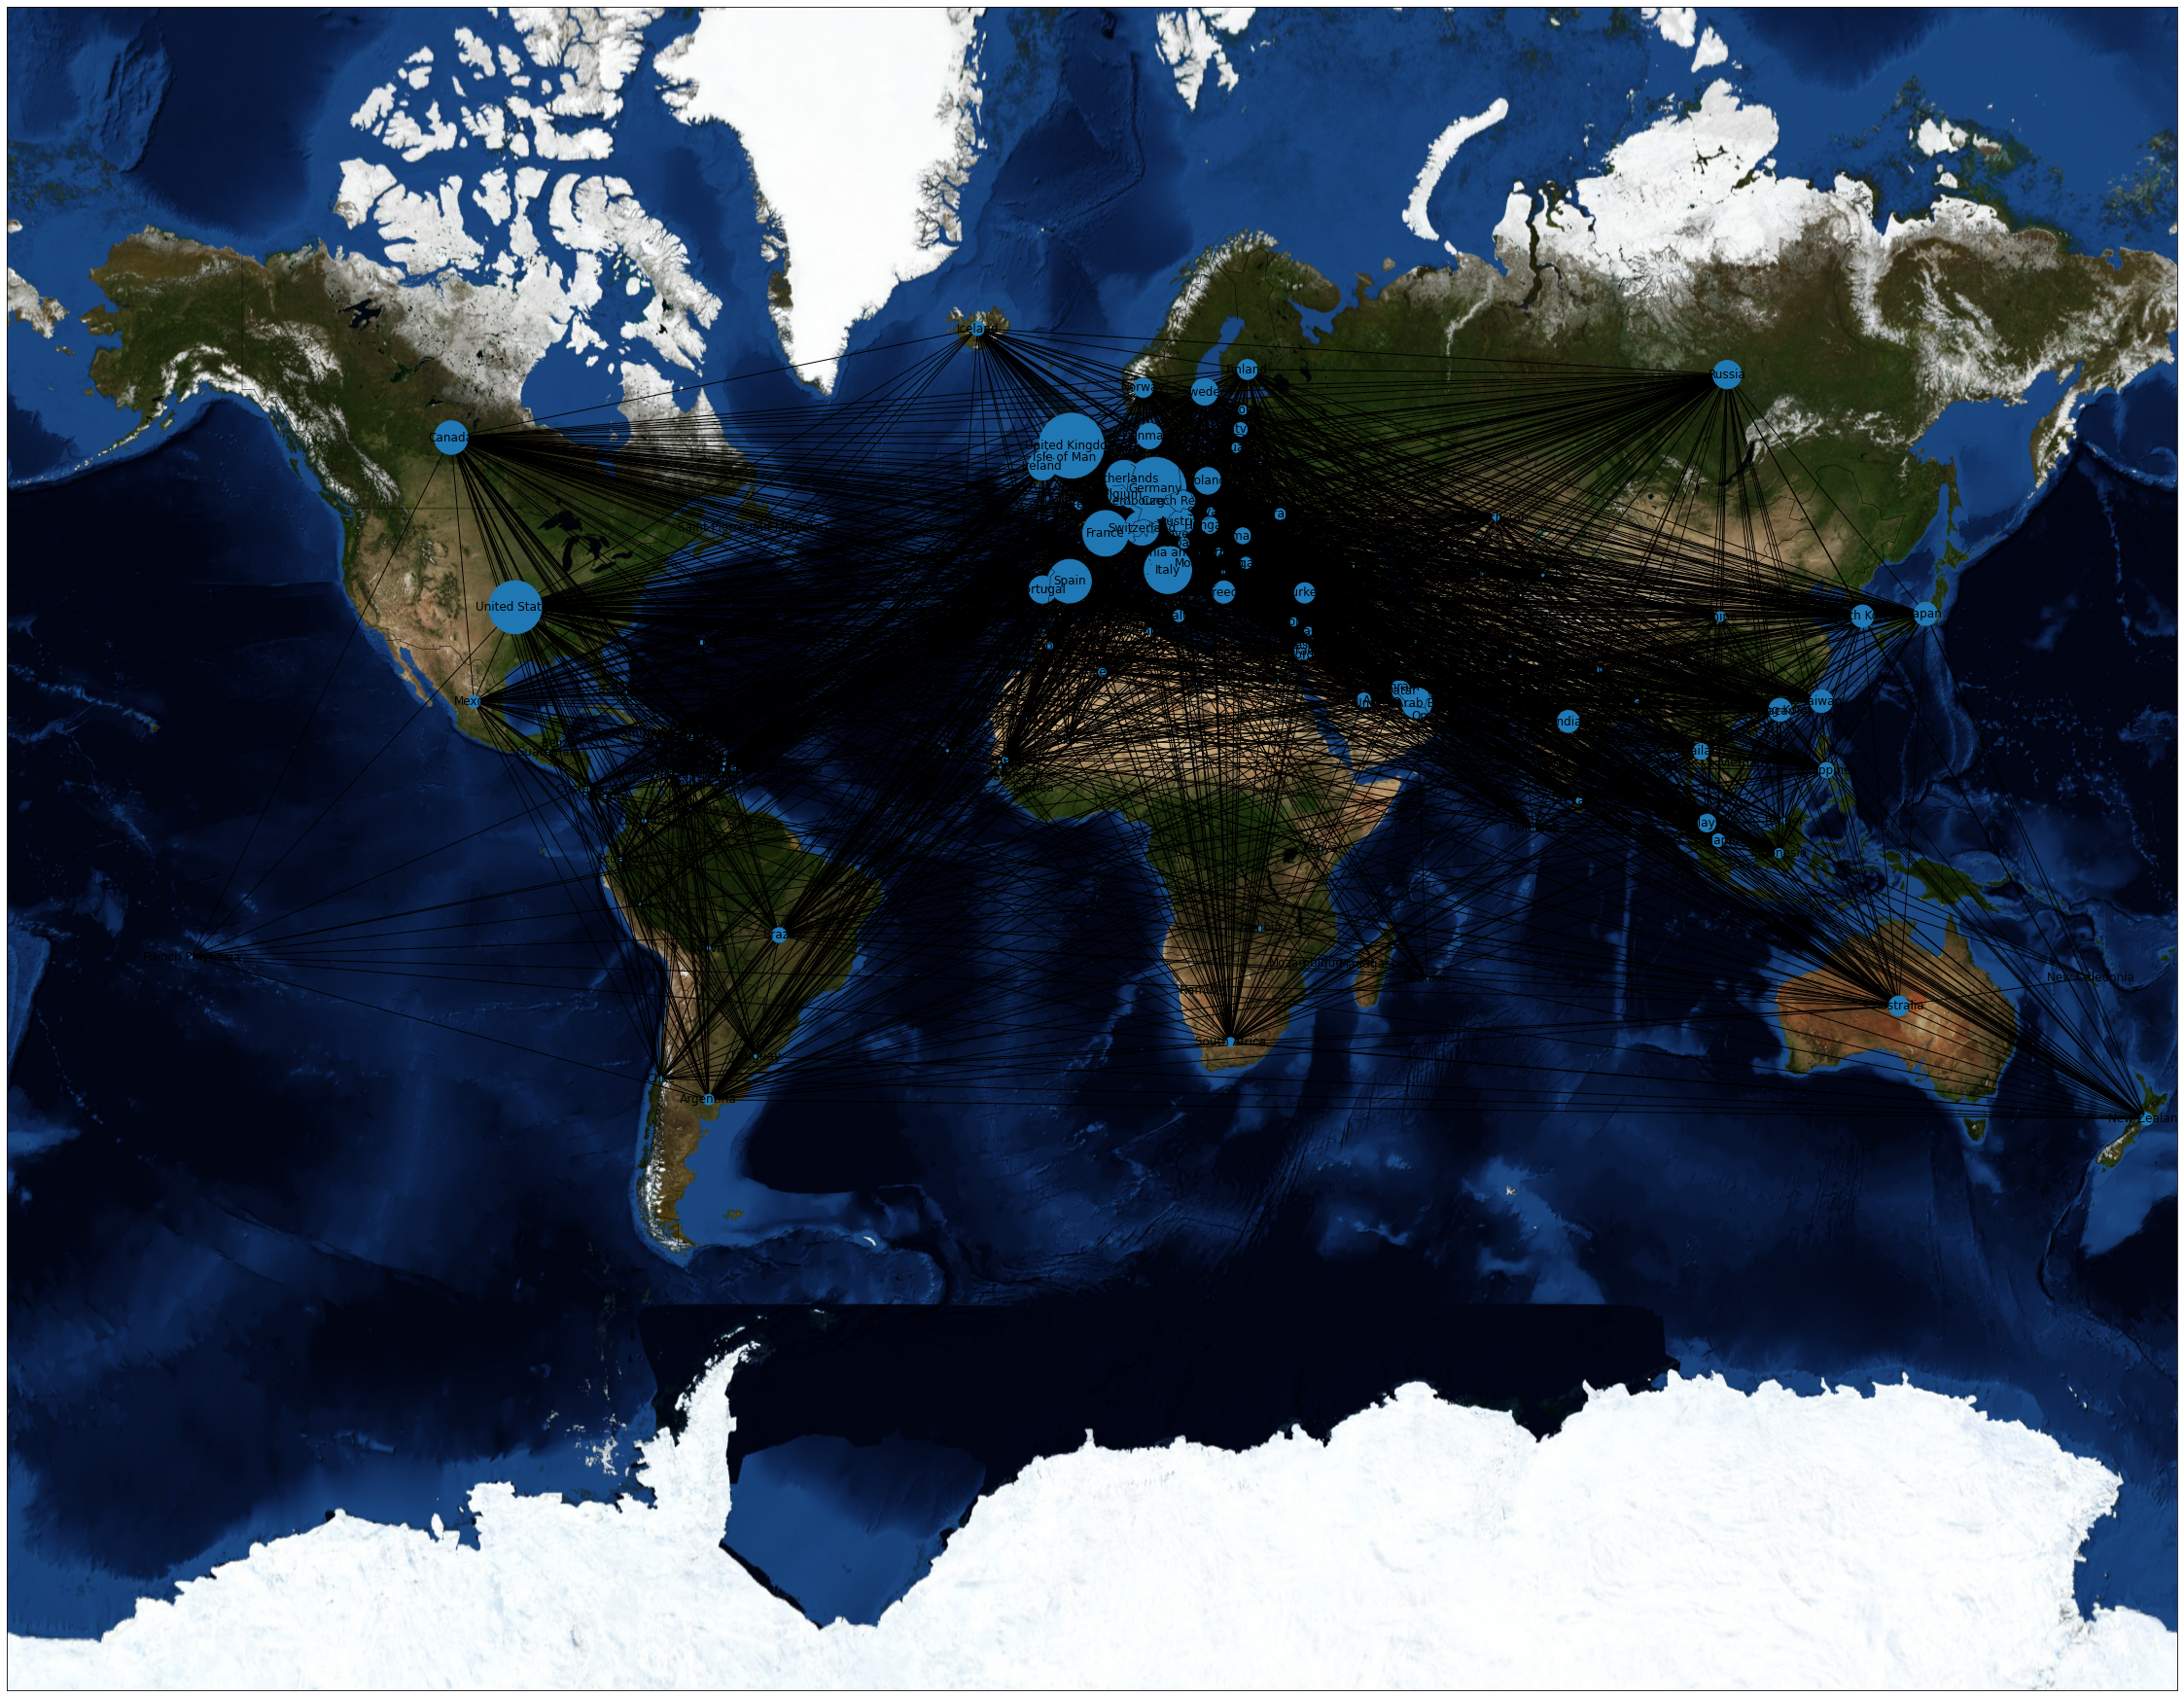

In [43]:
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

country_list = transition_matrix['pais_origem'].unique()
pos={}

for country in country_list:
  pos[country] = (m(float(lat_long.loc[country, 'longitude']),float(lat_long.loc[country, 'latitude'])))

nx.draw_networkx(G,pos,node_size=nodes_size)

m.drawcountries()
m.bluemarble()
mpl.rcParams['figure.figsize'] = [40, 40]
plt.savefig("graph")